In [63]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import joblib
import warnings
import tensorflow as tf
import numpy as np

from src.models import LeNet
from src.data_utils import *
from scipy import stats


warnings.filterwarnings("ignore")
tf.get_logger().setLevel(tf.logging.ERROR)
np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
%%time
(X_train, y_train), (X_test, y_test) = get_mnist()
X_train, X_train_db, y_train, y_train_db = split_to_create_db(X_train, y_train, fold_size=0.2)

# prepare the model
lenet = LeNet(
    input_shape=X_train.shape[1:],
    num_classes=10,
)

lenet.load_model("Assets/lenet-0.5-20-4folds.h5")
db = joblib.load("Assets/db_1000_iters.jblib")

Wall time: 3.48 s


In [17]:
iters_acc = []
for mc_iters, mean_var_vecs in db.items():
    acc = probs_accuracy(mean_var_vecs[0], y_train_db)
    iters_acc.append((mc_iters, acc))

In [18]:
iters, accs = zip(*iters_acc)
iters_acc = sorted(iters_acc, key=lambda a: a[1], reverse=True)

# Accuracy as mc_iters

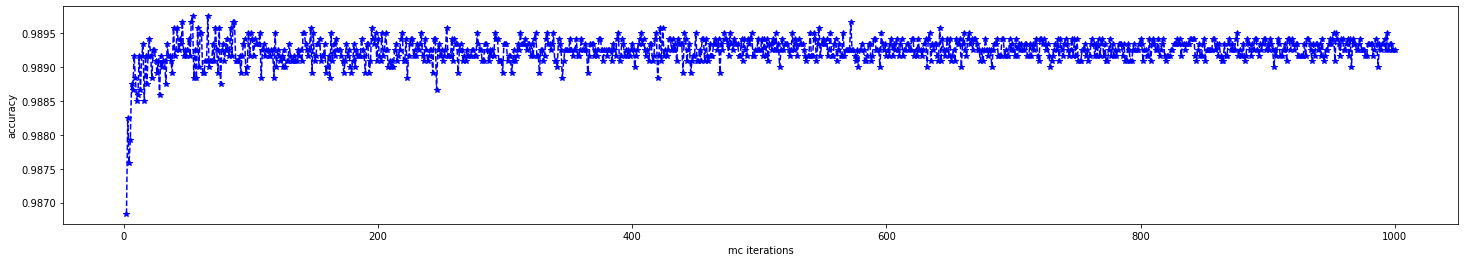

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,4))
plt.xlabel('mc iterations')
plt.ylabel('accuracy')
# plt.xticks(range(2,1000), iters)
plt.plot(iters, accs,  marker='*', linestyle='--', color='b')

# Top 10 accuracy and mc_iters

In [20]:
iters_acc[:10]

[(54, 0.98975),
 (66, 0.98975),
 (46, 0.9896666666666667),
 (53, 0.9896666666666667),
 (86, 0.9896666666666667),
 (87, 0.9896666666666667),
 (572, 0.9896666666666667),
 (39, 0.9895833333333334),
 (42, 0.9895833333333334),
 (58, 0.9895833333333334)]

In [21]:
0.98975-0.9895833333333334  # gap between 1th and 10th

0.0001666666666666483

<div dir="rtl">

<h3>
המטרה היא לעשות שני מבחנים ססטיסטיים:
</h3>   
    
1.1.) בין הציון המקורי (ללא  dropout) לבין הציון המתקבל לאחר מספר ריצות ה-dropout האופטימלי המוקדם ביותר (במבט לאחור לאחר הניתוח, כמובן). המטרה פה היא לראות שבאמת שיפרת באופן שהוא תקף 
    סטטיסטית (לבדוק את פוטנציאל השיפור שלנו)

1.2.) בין הציון שהשגת ע"י מספר הריצות האופטימלי לבין זה של 100 (להבין אם זה יוצא באמת אותו דבר, או אם 100 ריצות יכולות גם לקלקל). המטרה פה היא בעיקר להבין אם ריצות נוספות יכולות גם לפגוע. כנראה שהתשובה היא לא, אבל לבדוק זה זול    
</div>


In [ ]:
y_pred_db_no_mc = lenet.model.predict(X_train_db)  # no mc-dropout
acc_no_mc = probs_accuracy(y_pred_db_no_mc, y_train_db)
print("accuracy without mc-dropout:", acc_no_mc)

### First test: y_after_54_iters and y_pred_db_no_mc

In [ ]:
y_after_54_iters = db.get(54)[0]
acc_54_mc = probs_accuracy(y_after_54_iters, y_train_db)
print(f"accuracy with 54 mc-dropout: {acc_54_mc}\nwith gap from no-mc: {(acc_54_mc-acc_no_mc):.5f}")

In [ ]:
ans = stats.ttest_rel(y_after_54_iters,y_pred_db_no_mc)
print("statistic:\n\t", ans.statistic)
print()
print("pvalue:\n\t", ans.pvalue)

### Second test: y_after_54_iters and y_after_100_iters

In [ ]:
y_after_100_iters = db.get(100)[0]
acc_100_mc = probs_accuracy(y_after_100_iters, y_train_db)
print(f"accuracy with 100 mc-dropout: {acc_100_mc}\nwith gap from no-mc:: {(acc_100_mc-acc_no_mc):.5f}")

In [ ]:
ans = stats.ttest_rel(y_after_54_iters,y_after_100_iters)
print("statistic:\n\t", ans.statistic)
print()
print("pvalue:\n\t", ans.pvalue)

ans = stats.ttest_rel(y_after_54_iters,y_after_100_iters)
print("statistic:\n\t", ans.statistic)
print()
print("pvalue:\n\t", ans.pvalue)

In [90]:
y_pred_db_no_mc = lenet.model.predict(X_train_db)  # no mc-dropout
acc_no_mc = probs_accuracy(y_pred_db_no_mc, y_train_db)
print("accuracy without mc-dropout:", acc_no_mc)

accuracy without mc-dropout: 0.98925


### First test: y_after_54_iters and y_pred_db_no_mc

In [91]:
y_after_54_iters = db.get(54)[0]
acc_54_mc = probs_accuracy(y_after_54_iters, y_train_db)
print(f"accuracy with 54 mc-dropout: {acc_54_mc}\nwith gap from no-mc: {(acc_54_mc-acc_no_mc):.5f}")

accuracy with 54 mc-dropout: 0.98975
with gap from no-mc: 0.00050


In [92]:
ans = stats.ttest_rel(y_after_54_iters,y_pred_db_no_mc)
print("statistic:\n\t", ans.statistic)
print()
print("pvalue:\n\t", ans.pvalue)

statistic:
	 [ 1.13915102 -1.06286427 -1.29728616  0.54088947 -3.3307186  -0.27558434
  0.77447545 -3.49099586 -1.70504317  7.12301404]

pvalue:
	 [2.54662910e-01 2.87864899e-01 1.94557686e-01 5.88593812e-01
 8.68834956e-04 7.82872087e-01 4.38664940e-01 4.82953287e-04
 8.82122589e-02 1.11626611e-12]


### Second test: y_after_54_iters and y_after_100_iters

In [93]:
y_after_100_iters = db.get(100)[0]
acc_100_mc = probs_accuracy(y_after_100_iters, y_train_db)
print(f"accuracy with 100 mc-dropout: {acc_100_mc}\nwith gap from no-mc:: {(acc_100_mc-acc_no_mc):.5f}")

accuracy with 100 mc-dropout: 0.9895
with gap from no-mc:: 0.00025


In [94]:
ans = stats.ttest_rel(y_after_54_iters,y_after_100_iters)
print("statistic:\n\t", ans.statistic)
print()
print("pvalue:\n\t", ans.pvalue)

statistic:
	 [ 0.90601192 -0.31868697 -0.46991521 -0.61705825  0.61877711  0.38286174
 -0.73033345  1.15629289  0.01492962 -0.80405975]

pvalue:
	 [0.36494773 0.74996944 0.63842414 0.53720801 0.53607495 0.70182906
 0.46520065 0.2475844  0.98808858 0.4213784 ]
